In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [14]:
classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
#     classLabels.append(fpt/.read())
    
    classLabels = fpt.read().rstrip().split()


In [15]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic', 'light', 'fire', 'hydrant', 'stop', 'sign', 'parking', 'meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports', 'ball', 'kite', 'baseball', 'bat', 'baseball', 'glove', 'skateboard', 'surfboard', 'tennis', 'racket', 'bottle', 'wine', 'glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot', 'dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell', 'phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy', 'bear', 'hair', 'drier', 'toothbrush']


### Read an image

In [38]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000002523945D540>

In [39]:
img = cv2.imread("img2.jpg")

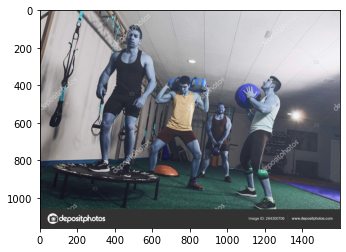

In [40]:
plt.imshow(img)

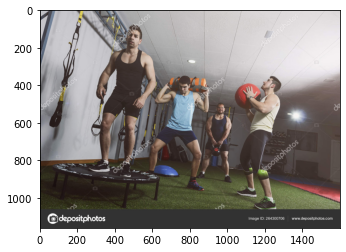

In [41]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Load the model

In [42]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [43]:
print(type(ClassIndex))

<class 'numpy.ndarray'>


In [44]:
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img, text = classLabels[ClassInd-1],org=(boxes[0]+10,boxes[1]+40), fontFace=cv2.FONT_HERSHEY_PLAIN,fontScale=3,color=(0,0,0),thickness=3)

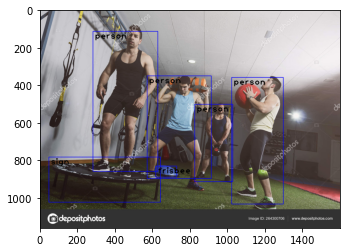

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Real time object detection

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("man-car.jpg") 

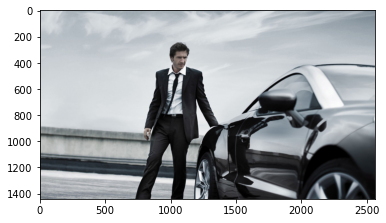

In [4]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
class_names = []
classFile = 'labels.txt'

In [6]:
with open(classFile,'rt') as f:
    class_names = f.read().rstrip('\n').split('\n')

In [8]:
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
config_path = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
weight_path = 'frozen_inference_graph.pb'

In [10]:
model = cv2.dnn_DetectionModel(weight_path, config_path)

In [11]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000021B36F0A7B0>

In [12]:
classIds, confs, bbox = model.detect(img, confThreshold=0.5)